In [1]:
!pip install pyvinecopulib


In [2]:
!pip install scikit-gstat


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skgstat as skg
import pyvinecopulib as pv


In [2]:
#load in data (same as in spcopula demo)
src = skg.data.meuse(variable='zinc')

coords, vals = src.get('sample')

# make a dataframe
df = pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'zinc': vals.flatten()})
df.head()

,x,y,zinc
0,181072,333611,1022
1,181025,333558,1141
2,181165,333537,640
3,181298,333484,257
4,181307,333330,269


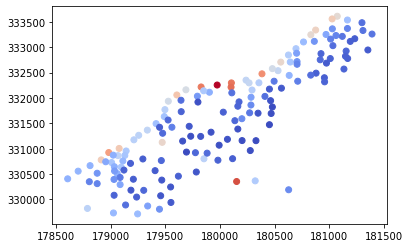

In [3]:
#create a scatter plot of the zinc value in the coordinatess
plt.scatter(df["x"],df["y"], c=df["zinc"], cmap=plt.cm.coolwarm)



In [4]:
#calculate rank 
# needed for expressing the values of zinc in [0,1]
# which is crucial for the copulas
def zinc_to_rank(zinc = df.rank()["zinc"]):
    df_rank = zinc/(len(zinc)+1)
    
    plt.hist(df_rank)
    return(df_rank)

,x,y,zinc,zinc_rank
0,181072,333611,1022,0.897436
1,181025,333558,1141,0.935897
2,181165,333537,640,0.724359
3,181298,333484,257,0.423077
4,181307,333330,269,0.448718
...,...,...,...,...
150,179184,330182,166,0.144231
151,179085,330292,496,0.628205
152,178875,330311,342,0.512821
153,179466,330381,162,0.134615


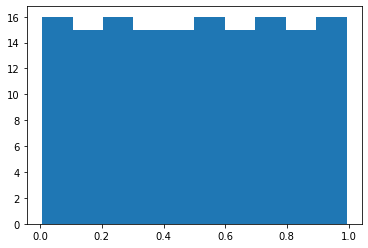

In [5]:
# add the rank column to the original dataframe
df["zinc_rank"] = zinc_to_rank(df.rank()["zinc"])
df

In [6]:
# calculate distances between all pairs of points

from scipy.spatial import distance_matrix
df_coordinates = df[["x","y"]]
distance_array = distance_matrix(df_coordinates, df_coordinates)

# convert the distnace matrix into a dataframe for easier access

distance_df = pd.DataFrame(distance_array)
distance_df


,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0.000000,70.837843,118.848643,259.239272,366.314073,473.629602,258.321505,252.049598,380.189426,471.008492,...,4304.014173,4385.565870,4425.191182,4194.974374,4077.205538,3914.407363,3868.323926,3964.443088,3607.233843,3449.821155
1,70.837843,0.000000,141.566239,282.851551,362.640318,471.199533,234.401365,195.010256,328.867755,441.530293,...,4236.122756,4316.784220,4355.550137,4126.296645,4007.817486,3845.342247,3798.730841,3894.291848,3538.899546,3391.434505
2,118.848643,141.566239,0.000000,143.171226,251.023903,356.866922,167.000000,222.081066,323.513524,375.033332,...,4278.052010,4365.122793,4411.447155,4173.908121,4061.434476,3896.201483,3854.403326,3956.156721,3584.262407,3389.963569
3,259.239272,282.851551,143.171226,0.000000,154.262763,242.156974,175.171345,296.786118,347.351407,322.818835,...,4292.750750,4386.465206,4440.764349,4194.687712,4088.695146,3920.739726,3884.100024,3992.349935,3603.447377,3361.647959
4,366.314073,362.640318,251.023903,154.262763,0.000000,108.577162,147.526269,281.937936,266.101484,178.518907,...,4162.607356,4260.340127,4319.896411,4068.314639,3966.640014,3796.976824,3763.871411,3876.723488,3476.475514,3212.786952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3914.407363,3845.342247,3896.201483,3920.739726,3796.976824,3786.887904,3753.359162,3676.331051,3579.912988,3620.842443,...,471.958685,476.656060,536.660041,296.082759,183.619171,0.000000,147.989865,334.846233,345.144897,1443.022176
151,3868.323926,3798.730841,3854.403326,3884.100024,3763.871411,3757.931479,3714.900268,3633.511387,3540.952697,3589.008916,...,599.736609,562.318415,557.046677,405.097519,217.082933,147.989865,0.000000,210.857772,391.256949,1545.369859
152,3964.443088,3894.291848,3956.156721,3992.349935,3876.723488,3875.800046,3821.201513,3734.408655,3647.002194,3703.768081,...,702.359595,596.896138,497.033198,494.814107,276.524863,334.846233,210.857772,0.000000,595.131078,1756.173397
153,3607.233843,3538.899546,3584.262407,3603.447377,3476.475514,3462.718152,3438.127688,3365.864673,3265.476382,3299.412827,...,702.659235,784.390209,880.273253,592.150319,528.674758,345.144897,391.256949,595.131078,0.000000,1176.606136


In [7]:
# find all pairs of locations that have a distance less than cutoff
cutoff_value = 1200
list_cutoff = np.argwhere(np.logical_and(distance_array < cutoff_value, distance_array > 0))
list_cutoff

# remove duplicate rows
list_cutoff_nodupe=[]
for row in list_cutoff:
    #ensure there are no duplicates
    if (row[0]<row[1]):
        list_cutoff_nodupe.append(row)
len(list_cutoff_nodupe)

# Create a new dataframe with the pairs of locations (cuttoff and no duplicates)
df_cutoff = pd.DataFrame(list_cutoff_nodupe, columns=["index1", "index2"])
df_cutoff

#add distances to the dataframe for each pair of locations
values = []

for index, row in df_cutoff.iterrows():
    values.append(distance_array[row["index1"]][row["index2"]])

df_cutoff["distance"] = values

# add zinc1 and zinc2 as values of zinc for index1 and index2
df_cutoff["zinc_rank1"] = list(df["zinc_rank"][(df_cutoff["index1"])])
df_cutoff["zinc_rank2"] = list(df["zinc_rank"][(df_cutoff["index2"])])

df_cutoff.rename(columns={"index1": "center_id", "index2": "neigh_id", "zinc_rank1":"center_rank","zinc_rank2":"neigh_rank"}).head()

,center_id,neigh_id,distance,center_rank,neigh_rank
0,0,1,70.837843,0.897436,0.935897
1,0,2,118.848643,0.897436,0.724359
2,0,3,259.239272,0.897436,0.423077
3,0,4,366.314073,0.897436,0.448718
4,0,5,473.629602,0.897436,0.461538


In [8]:
# bin the values according to distance 
num_bins = 10
bin_values, bin_intervals = pd.cut(df_cutoff["distance"], bins = num_bins,
                                   labels = range(0,num_bins),
                                   retbins=True)
df_cutoff["bins"] = bin_values
df_cutoff

,index1,index2,distance,zinc_rank1,zinc_rank2,bins
0,0,1,70.837843,0.897436,0.935897,0
1,0,2,118.848643,0.897436,0.724359,0
2,0,3,259.239272,0.897436,0.423077,1
3,0,4,366.314073,0.897436,0.448718,2
4,0,5,473.629602,0.897436,0.461538,3
...,...,...,...,...,...,...
5224,150,153,345.144897,0.144231,0.134615,2
5225,151,152,210.857772,0.628205,0.512821,1
5226,151,153,391.256949,0.628205,0.134615,3
5227,152,153,595.131078,0.512821,0.134615,4


In [9]:
# find the mean value for each bin
bin_means = df_cutoff[["distance","bins"]].groupby('bins').mean()
bin_count = df_cutoff[["distance","bins"]].groupby('bins').count()

# Store the means in a list
bin_means_list = np.concatenate((bin_means.values)).tolist()
bin_count_list = np.concatenate((bin_count.values)).tolist()


In [10]:
bin_values

0       0
1       0
2       1
3       2
4       3
       ..
5224    2
5225    1
5226    3
5227    4
5228    9
Name: distance, Length: 5229, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [11]:
#make separate dataframes for each bin
bins_data = []
for i in range(0, num_bins):
    bins_data.append(df_cutoff[df_cutoff["bins"]==(i)])
bins_data[0].rename(columns={"index1": "center_id", "index2": "neigh_id", "zinc_rank1":"center_rank","zinc_rank2":"neigh_rank"}).head()

,center_id,neigh_id,distance,center_rank,neigh_rank,bins
0,0,1,70.837843,0.897436,0.935897,0
1,0,2,118.848643,0.897436,0.724359,0
37,1,2,141.566239,0.935897,0.724359,0
76,2,3,143.171226,0.724359,0.423077,0
113,3,4,154.262763,0.423077,0.448718,0


In [12]:
#calculate kendallstau per bin
from scipy import stats

kendall_list = []
for bin_data in bins_data:
    kendall_list.append(stats.kendalltau(bin_data["zinc_rank1"], bin_data["zinc_rank2"])[0])
    


In [13]:
def fit_model_kendall(bin_means_list, kendall_list, cutoff, degree=3):
    list(pd.Series(kendall_list).replace(np.nan, 0))
    df_temp = pd.DataFrame({'bin_mean': bin_means_list, 'kendall': kendall_list})
    
    
    if (len(bin_means_list) > 1):
        if (df_temp[df_temp['kendall'] <= 0].empty == False and degree==1):
            first_index = df_temp[df_temp['kendall'] <= 0].index[0]
            df_temp = df_temp.drop(df_temp.index[first_index:])  


    
    #df1=df.drop(df.index[2:])

    
    model = np.polyfit(df_temp['bin_mean'], df_temp['kendall'], degree)
    predict = np.poly1d(model)
    
    
    #predict the kendall's tau for each bin
    kendall_list_predict = predict(df_temp['bin_mean'])
    if degree==1:
        root = int(predict.roots)
    else:
        root=1200
        
    x_lin_reg = range(0, root)
    y_lin_reg = predict(x_lin_reg)
    
    #find the point at which the pedict(x_lin_reg)==0
    
    x_lin_reg2 = range(root,1200)
    y_lin_reg2 = np.zeros(len(x_lin_reg2))
    
    if (len(bin_means_list) > 2): 
        plt.xlabel("Distance")
        plt.ylabel("Kendall's Tau")

        plt.scatter(bin_means_list, kendall_list)
        plt.plot(x_lin_reg, y_lin_reg, c='green')
        plt.plot(x_lin_reg2, y_lin_reg2, c='green')
    return(predict, kendall_list_predict, df_temp['bin_mean'])#if we return the model to use to predict here


In [14]:
df_temp = pd.DataFrame({'bin_mean': bin_means_list, 'kendall': kendall_list})

if (df_temp[df_temp['kendall'] <= 0].empty == False):
    first_index = df_temp[df_temp['kendall'] <= 0].index[0]
    df_temp = df_temp.drop(df_temp.index[first_index:])  


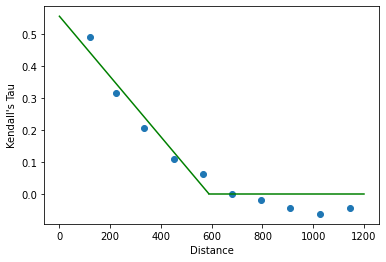

In [15]:
degree = 1

model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value, degree)

In [16]:
bin_means_cut

0    119.783934
1    220.937395
2    334.982687
3    450.341689
4    564.364184
Name: bin_mean, dtype: float64

In [17]:
import pyvinecopulib as pv
import numpy as np

def bins_to_cop(bins_data, family_set, kendall_tau_predict, bin_means_cut):
    
    cops=[]

    # loop over the bins
    for i in range(0, len(bin_means_cut)):

        # define the data u1 and u2 from the ranks
        rank1 = np.array(bins_data[i]["zinc_rank1"])
        rank2 = np.array(bins_data[i]["zinc_rank2"])
        data = np.stack((rank1,rank2), axis = 0 ).T

        # define the family set and fitting method
        controls = pv.FitControlsBicop(family_set=family_set,
                                       parametric_method="itau")

        # append the current copula to the list of copulas
        cops.append(pv.Bicop(data = data, controls=controls))

        # set the parametrs to the optimal parameter according 
        # to the predicted kendall's tau
        cops[i].parameters = cops[i].tau_to_parameters(kendall_tau_predict[i])
    
    if (len(kendall_tau_predict) > 1):
        print(len(kendall_tau_predict))
        cops.append(pv.Bicop(pv.BicopFamily.indep))

    return(cops)

In [18]:
# define the family set as all the families that can be fitter through tau
family_set = [ pv.BicopFamily.indep, pv.BicopFamily.gaussian,  
               pv.BicopFamily.clayton, pv.BicopFamily.gumbel, pv.BicopFamily.frank, pv.BicopFamily.joe]
# 
cops = bins_to_cop(bins_data, family_set, kendall_list_predict, bin_means_cut)
cops

5


[<pyvinecopulib.Bicop>
 Gumbel 180°, parameters = 1.79849,
 <pyvinecopulib.Bicop>
 Gumbel 180°, parameters = 1.53474,
 <pyvinecopulib.Bicop>
 Clayton, parameters = 0.633964,
 <pyvinecopulib.Bicop>
 Clayton, parameters = 0.303385,
 <pyvinecopulib.Bicop>
 Independence,
 <pyvinecopulib.Bicop>
 Independence]

WE ARE DONE WITH COPULAS NOW, WE NEED TO DO THE NEIGHBOURHOOD AND CONDITIONAL NEIGHBOURHOOD


In [19]:
# now find the neighbours 
def build_neighbourhood(dataframe, neighbourhood_size=5):
    neigh_list = []
    for i in range(0,155):
        curr_df = dataframe[dataframe["index1"]==(i)].sort_values(by=['distance'])
        curr_df = curr_df.reset_index(drop=True)
        neigh_list.append(curr_df.head(neighbourhood_size))

    return(neigh_list)

In [20]:
#We are back to the original dataset with original distances
#distance_array
list_of_indexes = np.argwhere(distance_array > 0)
list_of_indexes.shape

(23870, 2)

In [21]:
# now we are working with the whole dataset (not cutoff)
df_whole = pd.DataFrame(list_of_indexes, columns=["index1", "index2"])

distance_value = []

for index, row in df_whole.iterrows():
    distance_value.append(distance_array[row["index1"]][row["index2"]])

df_whole["zinc_rank1"] = list(df["zinc_rank"][(df_whole["index1"])])
df_whole["zinc_rank2"] = list(df["zinc_rank"][(df_whole["index2"])])
df_whole["distance"] = distance_value
df_whole.head()

,index1,index2,zinc_rank1,zinc_rank2,distance
0,0,1,0.897436,0.935897,70.837843
1,0,2,0.897436,0.724359,118.848643
2,0,3,0.897436,0.423077,259.239272
3,0,4,0.897436,0.448718,366.314073
4,0,5,0.897436,0.461538,473.629602


In [22]:
def distance_to_bin(distance, bin_means_list):
    if (len(bin_means_list)>1):
        iwidth = bin_means_list[1] - bin_means_list[0]
    else:
        return (0)
    bin_result = np.searchsorted(bin_means_list, distance, side='right')
    #bin_result = np.clip(bin_result, 0, 9)
    #print ("Your element belongs in bin: ", bin_result)
    return(bin_result)

#distances = [0, 100, 200, 300, 350, 400, 500, 600,650, 700, 800] #df_cutoff["distance"].iloc(0)[0]

#for distance in distances:
#    bin_result = distance_to_bin(distance) #number of bin

In [23]:
def bin_to_copulas(bin_result, bin_means_list, curr_distance):
    
    # find copula indx and lambda from the bin result
    if (bin_result == 0):
        copula_idx = (0, 0)
        curr_lambda = 1
    elif (bin_result == len(bin_means_list)):
        if (len(bin_means_list)>1):
            copula_idx = (len(bin_means_list), len(bin_means_list))
        else:
            copula_idx = (0,0)
        
        curr_lambda = 1
        #print(curr_distance,bin_result, bin_means_list[len(bin_means_list)-1])
        #print(copula_idx)
    else:
        copula_idx = (bin_result - 1, bin_result)
        #print(bin_result)
        #print(bin_means_list)
        curr_lambda = (curr_distance - bin_means_list[copula_idx[0]]) / (bin_means_list[copula_idx[1]] - bin_means_list[copula_idx[0]])
    
    return copula_idx, curr_lambda #copula_idx is a tuple (0,1) and curr_lamba is a number
    #print(copula1_idx, copula2_idx, curr_lambda)

In [24]:
def calc_hfunc(curr_lambda, copula1, copula2, row):
    hfunc_value = ((1 - curr_lambda) * copula1.hfunc1([[row["zinc_rank1"],row["zinc_rank2"]]])[0])  \
            + (curr_lambda * copula2.hfunc1([[row["zinc_rank1"],row["zinc_rank2"]]])[0])

    return hfunc_value

In [25]:
def build_next_neighbourhood(list_neighbourhood, bin_means_list, cops, model, bin_means_cut):  
    #list_neighbourhood_hfunc=[]
    list_neighbourhood_updated =[]

    for neigh in list_neighbourhood:

        # pass in the rows, one by one in the hfucn1
        
        list_hfunc = []
        for i, row in neigh.iterrows():

            # check which bin the row belongs in
            bin_result = distance_to_bin(row["distance"], bin_means_cut) 
            # calculate copulaidx and lambda
            copulas_idx, curr_lambda = bin_to_copulas(bin_result, bin_means_cut, row["distance"])
            
            copula1, copula2 = cops[copulas_idx[0]], cops[copulas_idx[1]]

            copula1.parameters = copula1.tau_to_parameters(np.maximum(0, model(row["distance"])))
            copula2.parameters = copula2.tau_to_parameters(np.maximum(0, model(row["distance"])))
            
            if copulas_idx[0] == (len(bin_means_cut)-1):
                #print(copula1)
                pass
            # now use the copulas to calculate hfunc
            hfunc_value = calc_hfunc(curr_lambda, copula1, copula2, row)
            if curr_lambda > 1:
                print(curr_lambda, copulas_idx, row)
                print(bin_means_list[copulas_idx[0]], bin_means_list[copulas_idx[1]])
                print("error")
            # append to current neighbourhood list
            list_hfunc.append(hfunc_value)
  
        # add hfunc column
        neigh["hfunc"] = list_hfunc
        # drop everything but the index of the neighbour and value of hfunc
        neigh_temp = neigh[["index2", "hfunc"]]
        #display(neigh_temp.rename(columns={ "index2": "neigh_id"}))
        #list_neighbourhood_hfunc.append(neigh_temp)
        
######### build new neighbourhood

        list_neighbourhood_temp = []

        for i in range(1,neigh_temp.shape[0]):
            index1 = int(neigh_temp.iloc[[0]]["index2"])
            index2 = int(neigh_temp.iloc[[i]]["index2"])
            zinc_rank1 = float(neigh_temp.iloc[[0]]["hfunc"])
            zinc_rank2 = float(neigh_temp.iloc[[i]]["hfunc"])


            list_for_df = [index1, index2, distance_df[index1][index2], zinc_rank1, zinc_rank2]
            list_neighbourhood_temp.append(list_for_df)

        new_neigh_df = pd.DataFrame(list_neighbourhood_temp, columns=["index1","index2","distance", "zinc_rank1", "zinc_rank2"]  )
        list_neighbourhood_updated.append(new_neigh_df)
        
    return(list_neighbourhood_updated)



In [26]:
def list_neigh_to_bin_mean(list_neighbourhood_temp,cutoff_value_temp, num_bins=10, degree=1):
    df_whole_temp = pd.DataFrame()
    for neigh in list_neighbourhood_temp:
        df_whole_temp = pd.concat([df_whole_temp, neigh], ignore_index=True)
        
        
    #cutoff_value_temp = 600
    df_whole_temp_cut = df_whole_temp[df_whole_temp["distance"]<cutoff_value_temp]
    
    
    #num_bins = 10
    bin_values, bin_intervals = pd.cut(df_whole_temp_cut["distance"], bins = num_bins,
                                       labels = range(0, num_bins),
                                       retbins=True)

    df_whole_temp_cut.loc[:,("bins")] = list(bin_values)
    bin_means = df_whole_temp_cut[["distance","bins"]].groupby('bins').mean()
    
    
    bins_data = []
    kendall_list = []

    for i in range(0, num_bins):
        bins_data.append(df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)])
        kendall_list.append(stats.kendalltau(df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)]["zinc_rank1"],
                                              df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)]["zinc_rank2"])[0])

    bin_means_list = np.concatenate((bin_means.values)).tolist()

    model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp, degree)
    
    return(bins_data, bin_means_list, kendall_list_predict, model_predict, bin_means_cut, kendall_list)

In [27]:
def spcopula_step(list_neighbourhood_curr, bin_means_curr, cops_curr, model_curr, bin_means_cut_curr, cutoff=600, num_bins=10, degree=3 ):
    list_neighbourhood_next = build_next_neighbourhood(list_neighbourhood_curr, bin_means_curr, cops_curr, model_curr, bin_means_cut_curr)
    bins_data_next, bin_means_list_next, kendall_list_predict_next, model_predict_next, bin_means_cut_next, kendall_list = list_neigh_to_bin_mean(list_neighbourhood_next, cutoff, num_bins, degree)
    cops_next = bins_to_cop(bins_data_next, family_set, kendall_list_predict_next, bin_means_cut_next)
    
    return(list_neighbourhood_next, bin_means_list_next, cops_next, model_predict_next, bin_means_cut_next, kendall_list)

In [28]:
# build the neighbourhoods (sorted by distance) and store them in a list
neigh_size = 20
list_neighbourhood = build_neighbourhood(df_whole, neigh_size)
list_neighbourhood[0].rename(columns={"index1": "center_id", "index2": "neigh_id", "zinc_rank1":"center_rank","zinc_rank2":"neigh_rank"})[["center_id","neigh_id","distance","center_rank","neigh_rank"]]

,center_id,neigh_id,distance,center_rank,neigh_rank
0,0,1,70.837843,0.897436,0.935897
1,0,2,118.848643,0.897436,0.724359
2,0,7,252.049598,0.897436,0.576923
3,0,6,258.321505,0.897436,0.525641
4,0,3,259.239272,0.897436,0.423077
5,0,12,336.434243,0.897436,0.923077
6,0,4,366.314073,0.897436,0.448718
7,0,13,373.483601,0.897436,0.634615
8,0,8,380.189426,0.897436,0.532051
9,0,83,399.656102,0.897436,0.455128


In [29]:
super_list_neighbourhood=[list_neighbourhood]
super_bin_means_list=[bin_means_list]
super_cops=[cops]
super_model_list = [model_predict]
super_bin_means_cut = [bin_means_cut]
num_bins_list = [num_bins]
cutoff_list = [cutoff_value]
degree_list = [degree]
super_kendall_list = [kendall_list]
# not parametrized by distance

num_bins_list.extend([10, 12, 12, 12, 12, 12, 8, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
num_bins_list.extend([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

cutoff_list.extend([1000, 1000, 800, 600, 600, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800])
cutoff_list.extend([1000, 1000, 800, 600, 600, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800])

degree_list.extend([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
degree_list.extend([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


4
1


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


4
2


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


5
3


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


7
4


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


7
5


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


6
6


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


3
7


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


5
8


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


2
9


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

10


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

11


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

12


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

13


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

14


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

15


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

16


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

17


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

18
19


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-26-5ad8614d3e9f>:30: RankWarning: Polyfit may be poorly conditioned
  model_predict, kendall_list_predict, bin_means_cut = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp

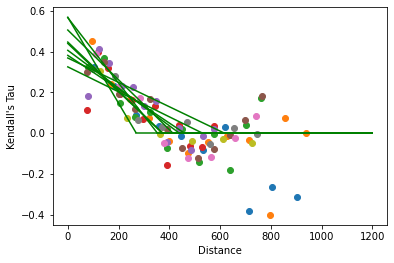

In [30]:
for i in range(1,neigh_size):
    super_list_neighbourhood_temp, super_bin_means_list_temp, super_cops_temp, super_model_temp, super_bin_means_cut_temp, super_kendall_list_temp = \
            spcopula_step(super_list_neighbourhood[i-1], super_bin_means_list[i-1],
                          super_cops[i-1], super_model_list[i-1], super_bin_means_cut[i-1], cutoff=cutoff_list[i], num_bins = num_bins_list[i],
                         degree = degree_list[i])
    super_list_neighbourhood.append(super_list_neighbourhood_temp)
    super_bin_means_list.append(super_bin_means_list_temp)
    super_cops.append(super_cops_temp)
    super_model_list.append(super_model_temp)
    super_bin_means_cut.append(super_bin_means_cut_temp)
    super_kendall_list.append(super_kendall_list_temp)
    print(i)

In [31]:
super_list_neighbourhood[0][2][0:4].rename(columns={"index1": "center_id", "index2": "neigh_id", "zinc_rank1":"center_rank","zinc_rank2":"neigh_rank"})[["center_id","neigh_id","distance","center_rank","neigh_rank"]]

,center_id,neigh_id,distance,center_rank,neigh_rank
0,2,0,118.848643,0.724359,0.897436
1,2,1,141.566239,0.724359,0.935897
2,2,3,143.171226,0.724359,0.423077
3,2,6,167.000000,0.724359,0.525641


In [32]:
super_list_neighbourhood[0][0]

,index1,index2,zinc_rank1,zinc_rank2,distance,hfunc
0,0,1,0.897436,0.935897,70.837843,0.826760
1,0,2,0.897436,0.724359,118.848643,0.427993
2,0,7,0.897436,0.576923,252.049598,0.354671
3,0,6,0.897436,0.525641,258.321505,0.305920
4,0,3,0.897436,0.423077,259.239272,0.210108
5,0,12,0.897436,0.923077,336.434243,0.885129
6,0,4,0.897436,0.448718,366.314073,0.309327
7,0,13,0.897436,0.634615,373.483601,0.519492
8,0,8,0.897436,0.532051,380.189426,0.406518
9,0,83,0.897436,0.455128,399.656102,0.337155


###MAGICAL FUNCTION TO GET PLOTS##

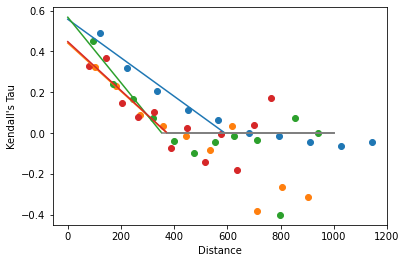

In [167]:
for i in range(4):
    predict = np.poly1d(super_model_list[i])

    #predict the kendall's tau for each bin
    kendall_list_predict = predict(df_temp['bin_mean'])
    root = int(predict.roots)

    x_lin_reg = range(0, root)
    y_lin_reg = predict(x_lin_reg)

    #find the point at which the pedict(x_lin_reg)==0
    diff = len(super_kendall_list[i])-len(super_bin_means_list[i])
    if diff < 0:
        for num in range(np.abs(diff)):
            #print(diff)
            super_kendall_list[i] = np.append(super_kendall_list[i],0)

    x_lin_reg2 = range(root,1000)
    y_lin_reg2 = np.zeros(len(x_lin_reg2))
    #print(super_bin_means_list[i], super_kendall_list[i])
    if (len(bin_means_list) > 2): 
        plt.xlabel("Distance")
        plt.ylabel("Kendall's Tau")

        plt.scatter(super_bin_means_list[i], super_kendall_list[i])
        plt.plot(x_lin_reg, y_lin_reg,)
        plt.plot(x_lin_reg2, y_lin_reg2, c='grey')


In [168]:
#now the big question is HOW DO WE PREDICT?
#probably? num_neighbourhood = 1
# we build the neighbourhood
# and we 

In [33]:
#  build a log normal, so that we have a different representation of zinc for testing
from scipy.stats import lognorm
import matplotlib.pyplot as plt
#ppf(q, s, loc=0, scale=1)

ln_mean = np.mean(np.log(df["zinc"]))
ln_std = np.std(np.log(df["zinc"]))
ln_mean_exp = np.exp(ln_mean)

frozen_lognorm = lognorm(s=ln_std, scale=ln_mean_exp)
zinc_ln = frozen_lognorm.cdf(df["zinc"])
df["zinc_ln"] = zinc_ln
df

,x,y,zinc,zinc_rank,zinc_ln
0,181072,333611,1022,0.897436,0.926547
1,181025,333558,1141,0.935897,0.945601
2,181165,333537,640,0.724359,0.788166
3,181298,333484,257,0.423077,0.319917
4,181307,333330,269,0.448718,0.342919
...,...,...,...,...,...
150,179184,330182,166,0.144231,0.141102
151,179085,330292,496,0.628205,0.672142
152,178875,330311,342,0.512821,0.471767
153,179466,330381,162,0.134615,0.133655


In [34]:
list_of_indexes = np.argwhere(distance_array > 0)
list_of_indexes.shape

(23870, 2)

In [35]:
# now we are working with the whole dataset (not cutoff)
df_whole_ln = pd.DataFrame(list_of_indexes, columns=["index1", "index2"])

distance_value = []

for index, row in df_whole_ln.iterrows():
    distance_value.append(distance_array[row["index1"]][row["index2"]])

df_whole_ln["zinc_ln1"] = list(df["zinc_ln"][(df_whole_ln["index1"])])
df_whole_ln["zinc_ln2"] = list(df["zinc_ln"][(df_whole_ln["index2"])])
df_whole_ln["distance"] = distance_value
df_whole_ln.head()

,index1,index2,zinc_ln1,zinc_ln2,distance
0,0,1,0.926547,0.945601,70.837843
1,0,2,0.926547,0.788166,118.848643
2,0,3,0.926547,0.319917,259.239272
3,0,4,0.926547,0.342919,366.314073
4,0,5,0.926547,0.365477,473.629602


In [36]:
# now we need to predict the mean with the expectation
# with the list_neighbourhood_ln as neighs
# df as our data train
# df as our data test
# super_cops for the copulas

In [37]:
# we might need this later 
# here we choose the number of neighbours we want for prediction
neigh_size = 20
list_neighbourhood_ln = build_neighbourhood(df_whole_ln, neigh_size)
list_neighbourhood_ln[154]

,index1,index2,zinc_ln1,zinc_ln2,distance
0,154,117,0.522803,0.833383,353.004249
1,154,81,0.522803,0.983606,503.135171
2,154,108,0.522803,0.191288,799.335974
3,154,107,0.522803,0.078518,848.958185
4,154,102,0.522803,0.213093,870.917907
5,154,101,0.522803,0.124486,914.617406
6,154,68,0.522803,0.858013,986.887025
7,154,106,0.522803,0.053712,1013.126349
8,154,109,0.522803,0.286703,1038.171469
9,154,100,0.522803,0.205142,1043.985153


In [38]:
dist_df_list = []
i = neigh_size 
spDepth = neigh_size 
for list_neigh in super_list_neighbourhood[0:spDepth]:
    temp_list=[]
    for neigh in list_neigh:
        #print(neigh[0:4]["distance"])
        temp_list.append(list(neigh[0:i]["distance"]))
    dist_df_list.append(pd.DataFrame(temp_list))
    i-=1
dist_df_list

[             0           1           2           3           4           5   \
 0     70.837843  118.848643  252.049598  258.321505  259.239272  336.434243   
 1     70.837843  141.566239  195.010256  234.401365  266.011278  282.851551   
 2    118.848643  141.566239  143.171226  167.000000  222.081066  251.023903   
 3    143.171226  154.262763  175.171345  242.156974  259.239272  282.851551   
 4    108.577162  147.526269  154.262763  178.518907  221.758878  244.296950   
 ..          ...         ...         ...         ...         ...         ...   
 150  117.038455  145.602198  147.989865  183.619171  217.117480  262.619497   
 151  116.361506  141.000000  147.989865  160.863296  210.857772  217.082933   
 152   81.412530  174.942848  205.000000  210.857772  242.866218  270.351623   
 153  158.294030  170.390727  195.747286  260.555176  260.823695  309.161770   
 154  353.004249  503.135171  799.335974  848.958185  870.917907  914.617406   
 
              6            7          

In [39]:
def build_xvalue(n):
    rat_temp = np.array([[1e-06, 1e-05, 1e-04, 1e-03]])
    rat_temp2 = np.array([[x for x in range(1,51)]])
    rat = rat_temp.T*rat_temp2
    rat_temp3 = np.array([x/n for x in range(1,n)])
    rat_inv = 1-rat
    rat_final = np.append(rat,rat_inv)
    rat_final = np.append(rat_final, rat_temp3)
    xvalue = np.sort(np.unique(rat_final.flatten()))
    
    return xvalue

In [40]:
def calc_hfunc_list(curr_lambda, copula1, copula2, u0temp):
    hfunc_value = ((1 - curr_lambda) * copula1.hfunc1(u0temp))  \
            + (curr_lambda * copula2.hfunc1(u0temp))
    return hfunc_value



In [41]:
def calc_pdf(curr_lambda, copula1, copula2, u0temp):
    pdf_value = ((1 - curr_lambda) * copula1.pdf(u0temp))  \
            + (curr_lambda * copula2.pdf(u0temp))

    return pdf_value

In [42]:
def dCopula(repCondVar, spVine, spDepth, models, h, nx):
    l0 = np.zeros(nx)
    u0 = repCondVar
    
    for spTree in range(0,spDepth):
        u1 = []
        curr_cops = spVine[spTree]
        curr_model = models[spTree]
        tmph = h[spTree]
        for i in range(0,len(tmph)):

            #calculate value to update l0
            u0temp = u0[:,[0,i+1]]

            curr_distance = tmph[i]
            # now we calculate the density of all pairs from u0temp 
            # we use the bins and appropriate copulas + lambdas

            # check which bin the row belongs in
            bin_result = distance_to_bin(curr_distance, super_bin_means_cut[spTree]) 

            # calculate copulaidx and lambda
            copulas_idx, curr_lambda = bin_to_copulas(bin_result,  super_bin_means_cut[spTree], curr_distance)
            
            copula1, copula2 = curr_cops[copulas_idx[0]], curr_cops[copulas_idx[1]]
            #update parameters
            copula1.parameters = copula1.tau_to_parameters(np.maximum(0, curr_model(curr_distance)))
            copula2.parameters = copula2.tau_to_parameters(np.maximum(0, curr_model(curr_distance)))

            # now use the copulas to calculate hfunc
            pdf_value = calc_pdf(curr_lambda, copula1, copula2, u0temp)
            hfunc_value = calc_hfunc_list(curr_lambda, copula1, copula2, u0temp)

            l0 = l0 + np.log(pdf_value)
            u1.append(hfunc_value)

        # now we want to calculate u1 from u0
        u1 = np.array(u1)
        u0 = u1.T

    return(np.exp(l0))
        

In [43]:
#to start with condSpVine we need the information contained in list_neighbourhood_ln and dist_df_list
def condSpVine(condVar ,  h, spVine, models, n = 1000):
    #condVar is list neighbourhood
    
    xvalue = build_xvalue(n)
    nx = len(xvalue)
    
    repCondVar = np.append(np.reshape(xvalue, (len(xvalue), 1)), np.repeat(np.matrix(condVar), nx, axis = 0), axis = 1)
    
    density = dCopula(repCondVar, spVine, spDepth, models, h, nx)
    left = max(0, 2*density[0] - density[1])
    right = max(0, 2*density[nx-1] - density[nx-2])
    density_extended = np.append(np.append(left, density),right)
    
    return density_extended

In [44]:
h_temp_small = []
h_big = []
for i in range(155):
    for dataFrame in dist_df_list:
        h_temp_small.append(dataFrame.iloc[i])
    h_big.append(h_temp_small)
    h_temp_small = []


In [52]:
super_list_neighbourhood[0][154]

,index1,index2,zinc_rank1,zinc_rank2,distance,hfunc
0,154,117,0.548077,0.788462,353.004249,0.763283
1,154,81,0.548077,0.987179,503.135171,0.986779
2,154,108,0.548077,0.233974,799.335974,0.233974
3,154,107,0.548077,0.051282,848.958185,0.051282
4,154,102,0.548077,0.285256,870.917907,0.285256
5,154,101,0.548077,0.121795,914.617406,0.121795
6,154,68,0.548077,0.826923,986.887025,0.826923
7,154,106,0.548077,0.006410,1013.126349,0.006410
8,154,109,0.548077,0.387821,1038.171469,0.387821
9,154,100,0.548077,0.269231,1043.985153,0.269231


In [48]:
h_big[154][0]

0      353.004249
1      503.135171
2      799.335974
3      848.958185
4      870.917907
5      914.617406
6      986.887025
7     1013.126349
8     1038.171469
9     1043.985153
10    1059.422484
11    1081.399556
12    1084.959446
13    1105.635112
14    1123.374381
15    1141.763986
16    1176.606136
17    1176.930329
18    1194.267139
19    1242.502716
Name: 154, dtype: float64

In [184]:
from scipy import integrate

xvals=build_xvalue(1000)
xvals_extended = np.append(np.append([0], xvals),[1])

density_list = []
integration_constant_list = []
result_list = []
count=0
error_list=[]

for i in range(155):
    density = condSpVine(list_neighbourhood_ln[i]['zinc_ln2'], h_big[i], super_cops, super_model_list)
    density_list.append(density)
    integration_constant = integrate.simpson(density, xvals_extended)
    integration_constant_list.append(integration_constant)
    
    result = integrate.simpson(((frozen_lognorm.ppf(xvals) * density[1:len(xvals)+1])/ integration_constant), xvals)
    result_list.append(result)
    if (result > 2000):
        print(i, result)
        error_list.append(result)
        count+=1
    
print("Final Result: " + str(np.median(abs(result_list - df["zinc"]))))    
print(count)

Final Result: 93.74098798125198
0


In [185]:
print("Final Result: " + str(np.mean(abs(result_list - df["zinc"]))))    


Final Result: 158.69757341148863


In [186]:
df_result = pd.DataFrame()
df_result["zinc"] = df["zinc"] 
df_result["result"] = (result_list)
#df_result["result"] = df_result["result"]
df_result = df_result[~df_result['result'].isin(error_list)]


In [187]:
print(np.mean(abs(df_result["result"] - df_result["zinc"]))) #185 with 1 bucket every time #177 with 1 bucket # best result 165

158.69757341148863


In [188]:
print(np.median(abs(df_result["result"] - df_result["zinc"])))

93.74098798125198


In [207]:
mean_absoulte_error = (np.mean(abs(df_result["result"] - df_result["zinc"])))
bias = (np.mean(df_result["result"] - df_result["zinc"]))
root_squared_error = (np.sqrt(np.mean((df_result["result"] - df_result["zinc"])**2)))
print(f"MAE: {mean_absoulte_error}")
print(f"Bias: {bias}")
print(f"RSE: {root_squared_error}")


MAE: 158.69757341148863
Bias: -33.1435755366259
RSE: 248.24861780302646


In [190]:
abs(df_result["result"] - df_result["zinc"]).describe()

count     155.000000
mean      158.697573
std       191.517873
min         1.090783
25%        37.016720
50%        93.740988
75%       194.254466
max      1157.686544
dtype: float64

In [349]:
#super_cops

In [193]:
df_result["x"] = df["x"]
df_result["y"] = df["y"]
df_result

,zinc,result,x,y
0,1022,809.578089,181072,333611
1,1141,773.473656,181025,333558
2,640,516.627625,181165,333537
3,257,516.040672,181298,333484
4,269,362.740988,181307,333330
...,...,...,...,...
150,166,267.529571,179184,330182
151,496,262.857502,179085,330292
152,342,445.103815,178875,330311
153,162,177.933719,179466,330381


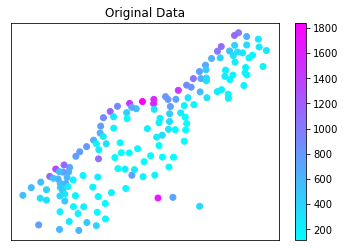

In [224]:
plt.scatter(df_result["x"],df_result["y"], c=df_result["zinc"], cmap=plt.cm.cool)
#get current axes
ax = plt.gca()

plt.xlabel("x")
plt.ylabel("y")
plt.title("Original Data")
#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)


plt.colorbar()
plt.show()

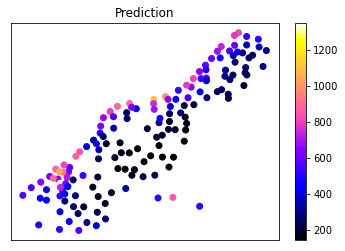

In [236]:
plt.scatter(df_result["x"],df_result["y"], c=df_result["result"], cmap=plt.cm.gnuplot2)
#get current axes
ax = plt.gca()

plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction")

#hide x-axis
ax.get_xaxis().set_visible(False)

#hide y-axis
ax.get_yaxis().set_visible(False)


plt.colorbar()
plt.show()

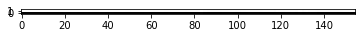

In [222]:
plt.imshow([df_result["x"],df_result["y"]],, origin="lower", cmap='gray', interpolation='nearest')


In [201]:
np.min(abs(df_result["result"] - df_result["zinc"]))

1.0907827919629085

3.150812932111722
522.1349426801784


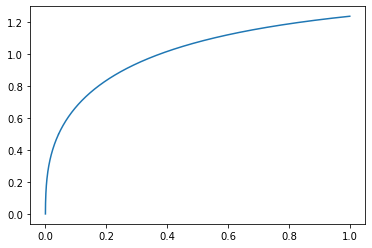

In [351]:
for i in [154]:
    plt.plot(xvals_extended, density_list[i]/integration_constant_list[i])
    print(integration_constant_list[i])
    print(result_list[i])

In [262]:
integration_const = np.sum((np.diff(xvals_extended)) * (0.5*np.diff(density)+density[0:len(density)-1]))
integration_const

25.966684543689293

In [263]:
np.diff(density)

array([2.88731936e-02, 2.88731936e-02, 2.29139864e-02, ...,
       5.17558668e-06, 5.17557808e-06, 5.17557808e-06])

In [264]:
np.median(abs(result_list - df["zinc"]))

101.46881880950883

In [230]:
minx = 178605.000000
maxx = 181390.000000
miny = 329714.000000
maxy = 333611.000000

df["y"].describe()


count       155.000000
mean     331634.935484
std        1047.746801
min      329714.000000
25%      330762.000000
50%      331633.000000
75%      332463.000000
max      333611.000000
Name: y, dtype: float64

In [ ]:
def points_to_image(xs, ys, ps, img_size):
    coords = np.stack((ys, xs))
    abs_coords = np.ravel_multi_index(coords, img_size)
    img = np.bincount(abs_coords, weights=ps, minlength=img_size[0]*img_size[1])
    img = img.reshape(img_size)

In [ ]:
func = np.interp(xvals_extended, xvals_extended, density, left=None, right=None, period=None)
func

In [ ]:
plt.plot(xvals_extended, func, 'o')
plt.plot(xvals_extended, func, '-x')
plt.show()

In [ ]:
# we have the function we have the xvals
# we just need to multpily at every point in xvals
# the value of density 
#with the inverse of the cdf??  (quantile function)


In [ ]:
ln_mean = np.mean(np.log(df["zinc"]))
ln_std = np.std(np.log(df["zinc"]))
ln_mean_exp = np.exp(ln_mean)

frozen_lognorm = lognorm(s=ln_std, scale=ln_mean_exp)

In [ ]:
integrate.simpson((frozen_lognorm.ppf(xvals_extended[0:len(xvals)]) * func[0:len(xvals)]/ integration_const), xvals)

In [ ]:
ln_std

In [ ]:
 
model = np.polyfit( xvals_extended,density, 7)
predict = np.poly1d(model)


#predict the kendall's tau for each bin
#kendall_list_predict = predict(bin_means_list)
x_lin_reg = xvals_extended
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'g')

In [ ]:
list_neighbourhood_ln[154]['zinc_ln2']

In [ ]:
super_cops



In [ ]:
super_cops[0][0].pdf([[0.1,0.9]])